#### Key Pandas Functions and Features

Here's a breakdown of key pandas functions and features, categorized for clarity:

#### Data Manipulation

*   `merge()`: Combine datasets based on common columns or indices.
*   `concat()`: Concatenate datasets along rows or columns.
*   `join()`: Merge datasets with index alignment.
*   `pivot()`: Reshape data using unique column values as rows and columns.
*   `melt()`: Convert wide-format data to long-format.

#### Handling Missing Data

*   `isnull()`: Detect missing values.
*   `fillna()`: Fill missing values with a specified value or method.
*   `dropna()`: Remove rows or columns containing missing values.
*   `interpolate()`: Estimate missing values using interpolation techniques.

#### Descriptive Statistics

*   `mean()`, `median()`, `std()`, `sum()`: Basic statistical calculations.
*   `describe()`: Generate descriptive statistics of a dataset.
*   `corr()`: Compute pairwise correlation of columns.

#### Indexing and Iteration

*   `.loc[]`: Label-based indexing to select rows/columns.
*   `.iloc[]`: Position-based indexing for selection.
*   `.iterrows()`: Iterate over rows as `(index, Series)` pairs.

#### Reshaping and Sorting

*   `sort_values()`: Sort values by a specific column or index.
*   `sort_index()`: Sort a dataset by its index.
*   `transpose()`: Transpose rows and columns.

#### Input/Output (I/O)

*   `read_csv()`, `to_csv()`: Read/write data to CSV files.
*   `read_excel()`, `to_excel()`: Read/write data to Excel files.
*   `read_sql()`, `to_sql()`: Interact with SQL databases.
*   `read_json()`, `to_json()`: Read/write JSON data.

#### Time Series Analysis

*   `date_range()`: Generate date ranges.
*   `resample()`: Group data by a new time frequency.
*   `shift()`: Shift data by a specified time or period.

#### Plotting

*   `.plot()`: Visualize data using built-in Matplotlib integration.
*   `.hist()`: Generate histograms for columns.
*   `.boxplot()`: Create boxplots to visualize data distribution.

#### General Utilities

*   `astype()`: Convert data types.
*   `duplicated()`: Find duplicate rows.
*   `unique()`: Get unique values from a column.
*   `apply()`: Apply custom functions to rows or columns.

In [2]:
## Sample Dataset

import pandas as pd

data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eve"],
    "Age": [25, 30, 35, 40, None],
    "Score": [85.5, 88.0, 92.0, 76.5, 88.0],
    "Department": ["HR", "IT", "Finance", "IT", "HR"],
}

df = pd.DataFrame(data)
print(df)

      Name   Age  Score Department
0    Alice  25.0   85.5         HR
1      Bob  30.0   88.0         IT
2  Charlie  35.0   92.0    Finance
3    David  40.0   76.5         IT
4      Eve   NaN   88.0         HR


#### Data Manipulation

In [3]:
## merge()
## Combines datasets based on common columns or indices.

dept_data = {"Department": ["HR", "IT", "Finance"], "Head": ["Sarah", "Tom", "Mike"]}
dept_df = pd.DataFrame(dept_data)

merged_df = df.merge(dept_df, on="Department")
print(merged_df)

## Explanation: Merges df with dept_df on the Department column, adding the Head column.

      Name   Age  Score Department   Head
0    Alice  25.0   85.5         HR  Sarah
1      Bob  30.0   88.0         IT    Tom
2  Charlie  35.0   92.0    Finance   Mike
3    David  40.0   76.5         IT    Tom
4      Eve   NaN   88.0         HR  Sarah


In [4]:
## concat()
## Concatenates datasets along rows or columns.

extra_data = pd.DataFrame({"Name": ["Frank"], "Age": [50], "Score": [90], "Department": ["Legal"]})
concat_df = pd.concat([df, extra_data], ignore_index=True)
print(concat_df)


## Explanation: Adds extra_data as new rows to df.

      Name   Age  Score Department
0    Alice  25.0   85.5         HR
1      Bob  30.0   88.0         IT
2  Charlie  35.0   92.0    Finance
3    David  40.0   76.5         IT
4      Eve   NaN   88.0         HR
5    Frank  50.0   90.0      Legal


In [5]:
## join()
## Merges datasets using the index.

index_df = dept_df.set_index("Department")
joined_df = df.join(index_df, on="Department")
print(joined_df)

## Explanation: Joins dept_df (with Department as the index) to df.

      Name   Age  Score Department   Head
0    Alice  25.0   85.5         HR  Sarah
1      Bob  30.0   88.0         IT    Tom
2  Charlie  35.0   92.0    Finance   Mike
3    David  40.0   76.5         IT    Tom
4      Eve   NaN   88.0         HR  Sarah


In [6]:
## pivot()
## Reshapes data using unique values as rows/columns.

pivoted = df.pivot(index="Name", columns="Department", values="Score")
print(pivoted)

## Explanation: Creates a table with names as rows, departments as columns, and scores as values.

Department  Finance    HR    IT
Name                           
Alice           NaN  85.5   NaN
Bob             NaN   NaN  88.0
Charlie        92.0   NaN   NaN
David           NaN   NaN  76.5
Eve             NaN  88.0   NaN


In [7]:
## melt()
## Converts wide-format data to long-format.

melted = df.melt(id_vars=["Name"], value_vars=["Age", "Score"])
print(melted)

## Explanation: Converts Age and Score into key-value pairs.

      Name variable  value
0    Alice      Age   25.0
1      Bob      Age   30.0
2  Charlie      Age   35.0
3    David      Age   40.0
4      Eve      Age    NaN
5    Alice    Score   85.5
6      Bob    Score   88.0
7  Charlie    Score   92.0
8    David    Score   76.5
9      Eve    Score   88.0


#### Handling Missing Data

In [8]:
## isnull()
## Detects missing values.

print(df.isnull())

## Explanation: Identifies missing values (True for missing, False otherwise).

    Name    Age  Score  Department
0  False  False  False       False
1  False  False  False       False
2  False  False  False       False
3  False  False  False       False
4  False   True  False       False


In [9]:
## fillna()
## Fills missing values with a specific value.

filled = df.fillna(0)
print(filled)

## Explanation: Replaces NaN in Age with 0.


      Name   Age  Score Department
0    Alice  25.0   85.5         HR
1      Bob  30.0   88.0         IT
2  Charlie  35.0   92.0    Finance
3    David  40.0   76.5         IT
4      Eve   0.0   88.0         HR


In [10]:
## dropna()
## Removes rows or columns with missing values.

dropped = df.dropna()
print(dropped)

## Explanation: Drops rows where any column contains NaN.

      Name   Age  Score Department
0    Alice  25.0   85.5         HR
1      Bob  30.0   88.0         IT
2  Charlie  35.0   92.0    Finance
3    David  40.0   76.5         IT


In [11]:
## interpolate()
## Estimates missing values by interpolation.

interpolated = df.interpolate()
print(interpolated)

## Explanation: Fills missing Age based on linear interpolation.

      Name   Age  Score Department
0    Alice  25.0   85.5         HR
1      Bob  30.0   88.0         IT
2  Charlie  35.0   92.0    Finance
3    David  40.0   76.5         IT
4      Eve  40.0   88.0         HR


/var/folders/7y/fzwln1_93mn3js3wyk61_6xm0000gn/T/ipykernel_67827/3471553180.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated = df.interpolate()


#### Descriptive Statistics

In [12]:
## mean()
## Computes the average of values.

print(df["Score"].mean())

## Explanation: Calculates the mean score.

86.0


In [13]:
## describe()
## Summarizes statistics for numerical columns.

print(df.describe())

## Explanation: Provides a summary (mean, min, max, etc.) for Age and Score.


             Age      Score
count   4.000000   5.000000
mean   32.500000  86.000000
std     6.454972   5.798707
min    25.000000  76.500000
25%    28.750000  85.500000
50%    32.500000  88.000000
75%    36.250000  88.000000
max    40.000000  92.000000


#### Indexing and Iteration

In [14]:
## .loc[]
## Selects rows/columns by label.

print(df.loc[0, "Name"])

## Explanation: Retrieves Name from the first row.

Alice


In [15]:
## .iloc[]
## Selects rows/columns by position.

print(df.iloc[2, 2])

## Explanation: Retrieves Score from the third row.

92.0


#### Reshaping and Sorting


In [16]:
## sort_values()
## Sorts rows by values in a column.

sorted_df = df.sort_values(by="Score", ascending=False)
print(sorted_df)

## Explanation: Sorts rows by Score in descending order.


      Name   Age  Score Department
2  Charlie  35.0   92.0    Finance
1      Bob  30.0   88.0         IT
4      Eve   NaN   88.0         HR
0    Alice  25.0   85.5         HR
3    David  40.0   76.5         IT


In [17]:
## transpose()
## Swaps rows and columns.

print(df.transpose())

## Explanation: Transposes the DataFrame.

                0     1        2      3     4
Name        Alice   Bob  Charlie  David   Eve
Age          25.0  30.0     35.0   40.0   NaN
Score        85.5  88.0     92.0   76.5  88.0
Department     HR    IT  Finance     IT    HR


#### I/O Functions

In [18]:
## read_csv() / to_csv()
## Reads/writes CSV files.

df.to_csv("output.csv", index=False)

## Explanation: Saves df to a file named output.csv.

In [19]:
## read_json() / to_json()
## Reads/writes JSON files.

df.to_json("output.json", orient="records")

## Explanation: Saves df as a JSON file.

In [20]:
## read_sql() / to_sql()
## Reads/writes data to a SQL database.

import sqlite3
conn = sqlite3.connect(":memory:")
df.to_sql("table_name", conn, index=False)
read_sql_df = pd.read_sql("SELECT * FROM table_name", conn)
print(read_sql_df)

## Explanation: Saves df to a SQL table and reads it back.


      Name   Age  Score Department
0    Alice  25.0   85.5         HR
1      Bob  30.0   88.0         IT
2  Charlie  35.0   92.0    Finance
3    David  40.0   76.5         IT
4      Eve   NaN   88.0         HR


In [22]:
## read_excel() / to_excel()
## Reads/writes Excel files.

df.to_excel("output.xlsx", index=False)

## Explanation: Exports df to an Excel file named output.xlsx.

#### Time Series Analysis

In [23]:
## date_range()
## Generates a range of dates.

dates = pd.date_range(start="2023-01-01", end="2023-01-07")
print(dates)

## Explanation: Creates a range of daily timestamps from January 1 to January 7, 2023

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07'],
              dtype='datetime64[ns]', freq='D')


In [24]:
## resample()
## Groups data by a new time frequency.

time_data = pd.DataFrame({
    "Date": pd.date_range(start="2023-01-01", periods=6, freq="D"),
    "Value": [10, 20, 30, 40, 50, 60],
}).set_index("Date")
resampled = time_data.resample("3D").mean()
print(resampled)

## Explanation: Groups the data by 3-day intervals and calculates the mean for each group.

            Value
Date             
2023-01-01   20.0
2023-01-04   50.0


In [26]:
## shift()
## Shifts data by a specified time period.

shifted = time_data["Value"].shift(1)
print(shifted)

## Explanation: Moves data down by one row, introducing a lag.

Date
2023-01-01     NaN
2023-01-02    10.0
2023-01-03    20.0
2023-01-04    30.0
2023-01-05    40.0
2023-01-06    50.0
Name: Value, dtype: float64


#### Plotting

<Axes: title={'center': 'Scores Over Index'}>

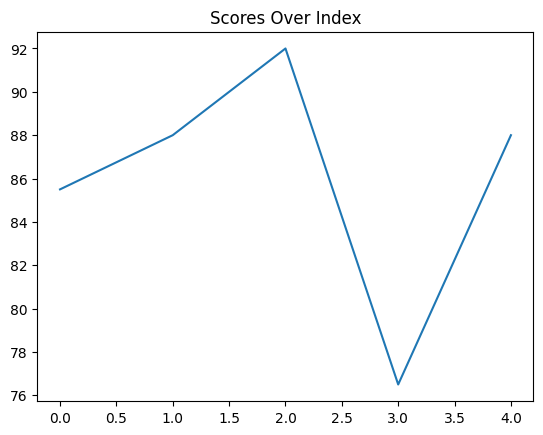

In [27]:
## .plot()
## Visualizes data using Matplotlib.

df["Score"].plot(kind="line", title="Scores Over Index")

## Explanation: Plots a line graph of Score values.

<Axes: title={'center': 'Score Distribution'}, ylabel='Frequency'>

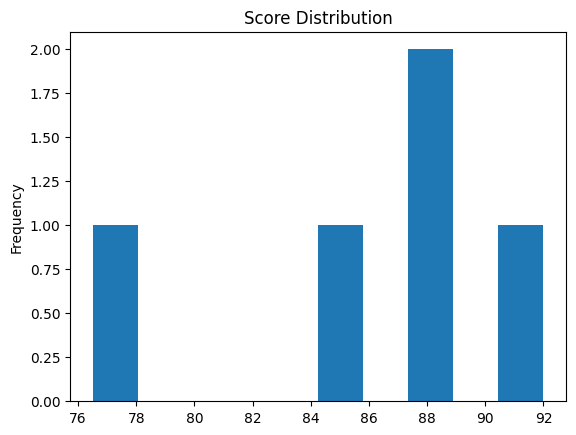

In [28]:
## .hist()
## Creates a histogram.

df["Score"].plot(kind="hist", title="Score Distribution")

## Explanation: Displays a histogram of Score values.

<Axes: >

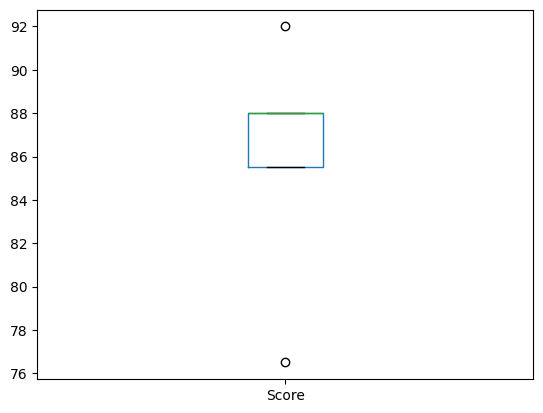

In [29]:
## .boxplot()
## Creates a boxplot.

df.boxplot(column=["Score"], grid=False)

## Explanation: Shows the distribution of Score with a boxplot.



#### General Utilities


In [30]:
## astype()
## Converts data types.

df["Age"] = df["Age"].astype(int, errors="ignore")
print(df.dtypes)

## Explanation: Converts the Age column to integers, ignoring errors.

Name           object
Age           float64
Score         float64
Department     object
dtype: object


In [31]:
## duplicated()
## Identifies duplicate rows.

print(df.duplicated())

## Explanation: Returns a boolean series indicating duplicate rows.

0    False
1    False
2    False
3    False
4    False
dtype: bool


In [32]:
## unique()
## Finds unique values in a column.

print(df["Department"].unique())

## Explanation: Lists unique department names.

['HR' 'IT' 'Finance']


In [33]:
## apply()
## Applies a custom function to rows or columns.

df["Score_Percentage"] = df["Score"].apply(lambda x: x / 100)
print(df)

## Explanation: Adds a new column by dividing each Score value by 100.

      Name   Age  Score Department  Score_Percentage
0    Alice  25.0   85.5         HR             0.855
1      Bob  30.0   88.0         IT             0.880
2  Charlie  35.0   92.0    Finance             0.920
3    David  40.0   76.5         IT             0.765
4      Eve   NaN   88.0         HR             0.880


#### Reshaping and Sorting (Continued)


In [34]:
## sort_index()
## Sorts a DataFrame by its index.

sorted_by_index = df.sort_index(ascending=False)
print(sorted_by_index)

## Explanation: Rearranges rows in reverse index order.



      Name   Age  Score Department  Score_Percentage
4      Eve   NaN   88.0         HR             0.880
3    David  40.0   76.5         IT             0.765
2  Charlie  35.0   92.0    Finance             0.920
1      Bob  30.0   88.0         IT             0.880
0    Alice  25.0   85.5         HR             0.855


#### Data Cleaning and Transformation

In [35]:
## replace()
## Replace specific values in a DataFrame.

df["Department"] = df["Department"].replace("HR", "Human Resources")
print(df)

## Explanation: Replaces "HR" with "Human Resources" in the Department column.

      Name   Age  Score       Department  Score_Percentage
0    Alice  25.0   85.5  Human Resources             0.855
1      Bob  30.0   88.0               IT             0.880
2  Charlie  35.0   92.0          Finance             0.920
3    David  40.0   76.5               IT             0.765
4      Eve   NaN   88.0  Human Resources             0.880


In [36]:
## map()
## Apply a function to each element of a Series.

df["Name_Length"] = df["Name"].map(len)
print(df)

## Explanation: Adds a new column with the length of each name.

      Name   Age  Score       Department  Score_Percentage  Name_Length
0    Alice  25.0   85.5  Human Resources             0.855            5
1      Bob  30.0   88.0               IT             0.880            3
2  Charlie  35.0   92.0          Finance             0.920            7
3    David  40.0   76.5               IT             0.765            5
4      Eve   NaN   88.0  Human Resources             0.880            3


In [37]:
## query()
## Query the DataFrame with a string expression.

filtered_df = df.query("Score > 85")
print(filtered_df)

## Explanation: Filters rows where the Score is greater than 85.


      Name   Age  Score       Department  Score_Percentage  Name_Length
0    Alice  25.0   85.5  Human Resources             0.855            5
1      Bob  30.0   88.0               IT             0.880            3
2  Charlie  35.0   92.0          Finance             0.920            7
4      Eve   NaN   88.0  Human Resources             0.880            3


In [38]:
# cut()
# Bin continuous data into discrete intervals.

df["Score_Bins"] = pd.cut(df["Score"], bins=[0, 80, 90, 100], labels=["Low", "Medium", "High"])
print(df)

# Explanation: Groups Score into bins labeled "Low," "Medium," and "High."

      Name   Age  Score       Department  Score_Percentage  Name_Length  \
0    Alice  25.0   85.5  Human Resources             0.855            5   
1      Bob  30.0   88.0               IT             0.880            3   
2  Charlie  35.0   92.0          Finance             0.920            7   
3    David  40.0   76.5               IT             0.765            5   
4      Eve   NaN   88.0  Human Resources             0.880            3   

  Score_Bins  
0     Medium  
1     Medium  
2       High  
3        Low  
4     Medium  


In [39]:
# qcut()
# Quantile-based discretization.

df["Score_Quantiles"] = pd.qcut(df["Score"], q=3, labels=["Low", "Medium", "High"])
print(df)

# Explanation: Divides Score into quantiles.

      Name   Age  Score       Department  Score_Percentage  Name_Length  \
0    Alice  25.0   85.5  Human Resources             0.855            5   
1      Bob  30.0   88.0               IT             0.880            3   
2  Charlie  35.0   92.0          Finance             0.920            7   
3    David  40.0   76.5               IT             0.765            5   
4      Eve   NaN   88.0  Human Resources             0.880            3   

  Score_Bins Score_Quantiles  
0     Medium             Low  
1     Medium          Medium  
2       High            High  
3        Low             Low  
4     Medium          Medium  


#### Data Aggregation

In [40]:
# groupby()
# Group data for aggregation or transformation.
    
grouped = df.groupby("Department")["Score"].mean()
print(grouped)

# Explanation: Calculates the mean Score for each Department.

Department
Finance            92.00
Human Resources    86.75
IT                 82.25
Name: Score, dtype: float64


In [41]:
# agg()
# Perform multiple aggregation operations.

summary = df.agg({"Score": ["mean", "max"], "Age": ["min", "max"]})
print(summary)

# Explanation: Computes multiple aggregations for selected columns.

      Score   Age
mean   86.0   NaN
max    92.0  40.0
min     NaN  25.0


In [42]:
# crosstab()
# Compute a cross-tabulation of two columns.

cross = pd.crosstab(df["Department"], df["Score"] > 85)
print(cross)

# Explanation: Creates a contingency table of Department and high Score.


Score            False  True 
Department                   
Finance              0      1
Human Resources      0      2
IT                   1      1


#### Index Handling

In [43]:
# set_index()
# Set a column as the DataFrame index.

indexed_df = df.set_index("Name")
print(indexed_df)

# Explanation: Uses the Name column as the DataFrame index.

          Age  Score       Department  Score_Percentage  Name_Length  \
Name                                                                   
Alice    25.0   85.5  Human Resources             0.855            5   
Bob      30.0   88.0               IT             0.880            3   
Charlie  35.0   92.0          Finance             0.920            7   
David    40.0   76.5               IT             0.765            5   
Eve       NaN   88.0  Human Resources             0.880            3   

        Score_Bins Score_Quantiles  
Name                                
Alice       Medium             Low  
Bob         Medium          Medium  
Charlie       High            High  
David          Low             Low  
Eve         Medium          Medium  


In [44]:
# reset_index()
# Reset the index of the DataFrame.

reset_df = indexed_df.reset_index()
print(reset_df)

# Explanation: Converts the index back into a regular column.

      Name   Age  Score       Department  Score_Percentage  Name_Length  \
0    Alice  25.0   85.5  Human Resources             0.855            5   
1      Bob  30.0   88.0               IT             0.880            3   
2  Charlie  35.0   92.0          Finance             0.920            7   
3    David  40.0   76.5               IT             0.765            5   
4      Eve   NaN   88.0  Human Resources             0.880            3   

  Score_Bins Score_Quantiles  
0     Medium             Low  
1     Medium          Medium  
2       High            High  
3        Low             Low  
4     Medium          Medium  


#### String Operations


In [45]:
# str.contains()
# Filter rows based on substrings.

filtered = df[df["Name"].str.contains("A")]
print(filtered)

# Explanation: Selects rows where Name contains "A."

    Name   Age  Score       Department  Score_Percentage  Name_Length  \
0  Alice  25.0   85.5  Human Resources             0.855            5   

  Score_Bins Score_Quantiles  
0     Medium             Low  


In [46]:
# str.split()
# Split strings into lists or columns.

df["Split_Name"] = df["Name"].str.split(" ")
print(df)

# Explanation: Splits Name values into parts.

      Name   Age  Score       Department  Score_Percentage  Name_Length  \
0    Alice  25.0   85.5  Human Resources             0.855            5   
1      Bob  30.0   88.0               IT             0.880            3   
2  Charlie  35.0   92.0          Finance             0.920            7   
3    David  40.0   76.5               IT             0.765            5   
4      Eve   NaN   88.0  Human Resources             0.880            3   

  Score_Bins Score_Quantiles Split_Name  
0     Medium             Low    [Alice]  
1     Medium          Medium      [Bob]  
2       High            High  [Charlie]  
3        Low             Low    [David]  
4     Medium          Medium      [Eve]  


#### Memory Optimization


In [47]:
# memory_usage()
# Get the memory usage of each column.

print(df.memory_usage())

# Explanation: Shows the memory footprint of the DataFrame.


Index               132
Name                 40
Age                  40
Score                40
Department           40
Score_Percentage     40
Name_Length          40
Score_Bins          137
Score_Quantiles     137
Split_Name           40
dtype: int64


In [48]:
# downcast()
# Reduce memory usage by downcasting numeric types.

df["Score"] = pd.to_numeric(df["Score"], downcast="float")
print(df.dtypes)

# Explanation: Converts Score to a smaller memory float type.



Name                  object
Age                  float64
Score                float32
Department            object
Score_Percentage     float64
Name_Length            int64
Score_Bins          category
Score_Quantiles     category
Split_Name            object
dtype: object
